In [1]:
import pandas as pd
import json 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import ttest_ind

In [2]:
aminer = pd.read_csv('preprocessed_data/aminer_computer.csv',index_col=0)

In [3]:
top5 = pd.read_csv('preprocessed_data/top5percn_cited_aminer.csv',index_col=0)

In [4]:
top5.head()

,title,year,keywords,authors,fos,doi,venue,venue_name
142,Focusing,1988.0,[],"[{'name': 'Eric Krotkov', 'sid': '23362393', '...",NaN,10.1007/bf00127822,"{'_id': '548267b8582fc50b5e32e70f', 'raw': 'In...",International Journal of Computer Vision
152,FreeSurfer.,2012.0,[],"[{'_id': '5487ec66dabfae8a11fb3eb2', 'name': '...",NaN,10.1016/j.neuroimage.2012.01.021,"{'_id': '555036be7cea80f95414fef2', 'raw': 'Ne...",NeuroImage
153,FSL.,2012.0,[],"[{'_id': '560175f345cedb3395e5a447', 'name': '...",NaN,10.1016/j.neuroimage.2011.09.015,"{'_id': '555036be7cea80f95414fef2', 'raw': 'Ne...",NeuroImage
279,Gandalf,1997.0,"['automated theorem proving', 'competition', '...","[{'_id': '53f44df7dabfaeb22f4dee29', 'name': '...",NaN,10.1023/a:1005887414560,"{'_id': '555036cf7cea80f954158d33', 'raw': 'J....",J. Autom. Reasoning
307,Geoslavery,2003.0,[],"[{'_id': '53f4361adabfaedf4357d672', 'name': '...",NaN,10.1109/mtas.2003.1188276,"{'_id': '555036cc7cea80f954158140', 'raw': 'IE...",IEEE Technol. Soc. Mag.


In [4]:
oc = pd.read_csv('preprocessed_data/oc_yrcleaned.csv')

In [16]:
len(oc)

22034203

In [6]:
oc_cc = oc.groupby(['cited']).agg({'citing':'count'}).reset_index()

In [7]:
oc_cc.sort_values(by='citing',ascending=False)

,cited,citing
2591179,10.1023/b:visi.0000029664.99615.94,13187
2182854,10.1016/s0019-9958(65)90241-x,13140
2408253,10.1017/cbo9780511804441,11158
2565327,10.1023/a:1010933404324,9883
30322,10.1002/0471200611,6881
...,...,...
2967787,10.1073/pnas.1200603109,1
2967790,10.1073/pnas.1200677109,1
2967792,10.1073/pnas.120069197,1
2967793,10.1073/pnas.1200697109,1


In [5]:
octop5 = oc[oc['cited'].isin(top5['doi'].values)]

In [9]:
octop5.head()

,Unnamed: 0,doi,citing,cited,citing_pub_year,cited_pub_year
0,4,10.1145/2789168.2790109,10.1145/2999572.2999582,10.1145/2789168.2790109,2016.0,2015.0
2,7,10.1145/2619239.2626319,10.1145/2999572.2999584,10.1145/2619239.2626319,2016.0,2014.0
4,24,10.1109/tnet.2006.886296,10.1145/2999572.2999585,10.1109/tnet.2006.886296,2016.0,2006.0
8,31,10.1145/2619239.2626328,10.1145/2999572.2999586,10.1145/2619239.2626328,2016.0,2014.0
9,33,10.1109/infcom.2000.832252,10.1145/2999572.2999587,10.1109/infcom.2000.832252,2016.0,2000.0


In [6]:
top5cites_yr = octop5.groupby(['cited','citing_pub_year']).agg({'citing':'count'}).reset_index()

In [7]:
top5cites = octop5.groupby(['cited']).agg({'citing':'count'}).reset_index()

In [8]:
doi_cites_map = dict(zip(top5cites['cited'],top5cites['citing']))

In [9]:
doi_year_map = dict(zip(top5['doi'],top5['year']))

In [10]:
top51 = top5[~top5['authors'].isna()]

In [16]:
len(top51)

184986

In [ ]:
top51['authors'] = top51['authors'].map(eval)

In [ ]:
top51['n_authors'] = top51['authors'].map(len)

In [13]:
top51 = top51[top51['n_authors']> 0]

In [14]:
def ds_percentile(filename, aminer_df, col_name):
    df = pd.read_csv(filename,names=['doi','ds'])
    ds_map = dict(zip(df['doi'],df['ds']))
    ds_name = col_name+'_ds'
    aminer_df[ds_name] = aminer_df['doi'].map(ds_map)
    sz = aminer_df[ds_name].size-1
    perc_name = col_name+'_percn'
    aminer_df[perc_name] = aminer_df[ds_name].rank(method='max').apply(lambda x: (x-1)/sz)
    return aminer_df

In [15]:
top52 = ds_percentile('results/res2/ds_top5_w0.txt',top51, 'all')
top52 = ds_percentile('results/res2/ds_top5_w2.txt',top52, 'w2')
top52 = ds_percentile('results/res2/ds_top5_w4.txt',top52, 'w4')
top52 = ds_percentile('results/res2/ds_top5_w6.txt',top52, 'w6')
top52 = ds_percentile('results/res2/ds_top5_w8.txt',top52, 'w8')
top52 = ds_percentile('results/res2/ds_top5_w10.txt',top52, 'w10')
top52 = ds_percentile('results/res2/ds_top5_w12.txt',top52, 'w12')

In [16]:
top52 = ds_percentile('results/res2/ds_top5_w14.txt',top52, 'w14')
top52 = ds_percentile('results/res2/ds_top5_w16.txt',top52, 'w16')
top52 = ds_percentile('results/res2/ds_top5_w18.txt',top52, 'w18')
top52 = ds_percentile('results/res2/ds_top5_w20.txt',top52, 'w20')

In [17]:
top52['cc'] = top52['doi'].map(doi_cites_map)

In [20]:
top52.head()

,title,year,keywords,authors,fos,doi,venue,venue_name,n_authors,all_ds,...,w12_percn,w14_ds,w14_percn,w16_ds,w16_percn,w18_ds,w18_percn,w20_ds,w20_percn,cc
142,Focusing,1988.0,[],"[{'name': 'Eric Krotkov', 'sid': '23362393', '...",NaN,10.1007/bf00127822,"{'_id': '548267b8582fc50b5e32e70f', 'raw': 'In...",International Journal of Computer Vision,1,-0.336391,...,0.024115,-0.168367,0.023564,-0.179612,0.020331,-0.207965,0.015785,-0.228571,0.012525,132
152,FreeSurfer.,2012.0,[],"[{'_id': '5487ec66dabfae8a11fb3eb2', 'name': '...",NaN,10.1016/j.neuroimage.2012.01.021,"{'_id': '555036be7cea80f95414fef2', 'raw': 'Ne...",NeuroImage,1,-0.031504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467
153,FSL.,2012.0,[],"[{'_id': '560175f345cedb3395e5a447', 'name': '...",NaN,10.1016/j.neuroimage.2011.09.015,"{'_id': '555036be7cea80f95414fef2', 'raw': 'Ne...",NeuroImage,5,-0.205087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,670
279,Gandalf,1997.0,"['automated theorem proving', 'competition', '...","[{'_id': '53f44df7dabfaeb22f4dee29', 'name': '...",NaN,10.1023/a:1005887414560,"{'_id': '555036cf7cea80f954158d33', 'raw': 'J....",J. Autom. Reasoning,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
307,Geoslavery,2003.0,[],"[{'_id': '53f4361adabfaedf4357d672', 'name': '...",NaN,10.1109/mtas.2003.1188276,"{'_id': '555036cc7cea80f954158140', 'raw': 'IE...",IEEE Technol. Soc. Mag.,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25


In [22]:
top52 = top52[~top52['all_ds'].isna()]

In [25]:
top52.to_csv('papers_with_ds_2_20.csv')

In [22]:
top52.sort_values(by='cc',ascending=False).head(10)

,title,year,keywords,authors,fos,doi,venue,venue_name,n_authors,all_ds,...,w12_percn,w14_ds,w14_percn,w16_ds,w16_percn,w18_ds,w18_percn,w20_ds,w20_percn,cc
2387862,Image quality assessment: from error visibilit...,2004.0,"['distorted image', 'quality assessment', 'hum...","[{'_id': '5448472edabfae87b7dfd01a', 'name': '...","['Computer vision', 'Cyclopean image', 'Human ...",10.1109/tip.2003.819861,"{'_id': '555036f27cea80f954168664', 'type': '0...",IEEE Transactions on Image Processing,4,-0.400874,...,0.012358,-0.353783,0.009628,-0.398735,0.007682,NaN,NaN,NaN,NaN,6543
1955375,A fast and elitist multiobjective genetic algo...,2002.0,"['genetic algorithms', 'multi-objective evolut...","[{'_id': '54484da3dabfae87b7e038be', 'name': '...","['Mathematical optimization', 'Evolutionary al...",10.1109/4235.996017,"{'_id': '5696ac7eb0b7fae0fc5048a0', 'type': '1...",IEEE Transactions on Evolutionary Computation,4,-0.433213,...,0.009801,-0.385688,0.008525,-0.409731,0.007352,-0.432558,0.006201,NaN,NaN,6349
1918468,LIBSVM: A library for support vector machines,2011.0,"['svm optimization problem', 'support vector m...","[{'_id': '53f556d3dabfae963d25d906', 'name': '...","['Structured support vector machine', 'Graph k...",10.1145/1961189.1961199,"{'_id': '5390ac6020f70186a0eb741c', 'raw': 'AC...",ACM Transactions on Intelligent Systems and Te...,2,-0.415552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6303
50699,Particle swarm optimization,1995.0,[],"[{'_id': '53f4508edabfaee2a1d5d01e', 'name': '...",NaN,10.1109/icnn.1995.488968,"{'type': '12', 'raw': 'Encyclopedia of Machine...",Encyclopedia of Machine Learning and Data Mining,2,-0.630867,...,0.009768,-0.503331,0.005438,-0.578174,0.003892,-0.612785,0.003271,-0.627853,0.002687,6184
8460,Compressed Sensing.,2006.0,"["". integrated sensing and processing. optimal...","[{'_id': '53f45177dabfaee02ad45f0b', 'name': '...",NaN,10.1109/tit.2006.871582,"{'_id': '555036b37cea80f954149ffa', 'type': '0...","Computer Vision, A Reference Guide",1,-0.126476,...,0.034684,-0.125630,0.032240,NaN,NaN,NaN,NaN,NaN,NaN,5628
2078587,Cooperative diversity in wireless networks: Ef...,2003.0,"['space constraint', 'wireless network', 'fadi...","[{'_id': '53f438fcdabfaedd74db93ae', 'name': '...","['Diversity gain', 'Wireless network', 'Antenn...",10.1109/tit.2004.838089,"{'_id': '54824fa4582fc50b5e02e699', 'type': '0...",IEEE Transactions on Information Theory,3,-0.127878,...,0.035360,-0.122909,0.033041,-0.126473,0.029137,-0.127878,0.026283,NaN,NaN,5565
2934273,A Computational Approach to Edge Detection,1986.0,"['edge detection', 'feature extraction', 'imag...","[{'_id': '53f4473cdabfaeb22f4c32cb', 'name': '...","['Canny edge detector', 'Image gradient', 'Der...",10.1109/tpami.1986.4767851,"{'_id': '5390790820f770854f5ae14d', 'raw': 'Re...","Readings in computer vision: issues, problems,...",1,-0.626476,...,0.012417,-0.329814,0.010514,-0.362685,0.008676,-0.395474,0.007174,-0.436816,0.005406,5538
1845085,Random sample consensus: a paradigm for model ...,1987.0,"['model fitting', 'automated image analysis', ...","[{'_id': '548fd5cddabfaef989f09b9c', 'name': '...","['Structure from motion', 'Computer vision', '...",10.1145/358669.358692,"{'_id': '5390790820f770854f5ae14d', 'raw': 'Re...","Readings in computer vision: issues, problems,...",2,-0.985556,...,0.000319,-0.943522,0.000324,-0.949622,0.000254,-0.964539,0.000130,-0.967366,0.000103,5254
1124048,Histograms of Oriented Gradients for Human Det...,2005.0,"['fine orientation binning', 'feature set', 'f...","[{'name': 'Navneet Dalal', 'org': 'INRIA Rhône...","['Object detection', 'Computer vision', 'Viola...",10.1109/cvpr.2005.177,"{'_id': '53a7256420f7420be8b4e0aa', 'name_d': ...",Computer Vision and Pattern Recognition,2,-0.104915,...,0.040306,-0.105582,0.038436,-0.104915,0.035241,NaN,NaN,NaN,NaN,4847
246021,Snakes-active contour models,1987.0,"['active contour model', 'scale space', 'motio...","[{'_id': '544861f0dabfae87b7e17590', 'name': '...","['Mumford–Shah functional', '

In [73]:
top52.columns

Index(['title', 'year', 'keywords', 'authors', 'fos', 'doi', 'venue',
       'venue_name', 'n_authors', 'all_ds', 'all_percn', 'w2_ds', 'w2_percn',
       'w4_ds', 'w4_percn', 'w6_ds', 'w6_percn', 'w8_ds', 'w8_percn', 'w10_ds',
       'w10_percn', 'w12_ds', 'w12_percn', 'cc'],
      dtype='object')

In [23]:
ds10_ds = top52[(top52['year']<=2010) & (top52['year']>=2000)]

Text(0.5, 9.444444444444438, 'disruption score $D_i$')

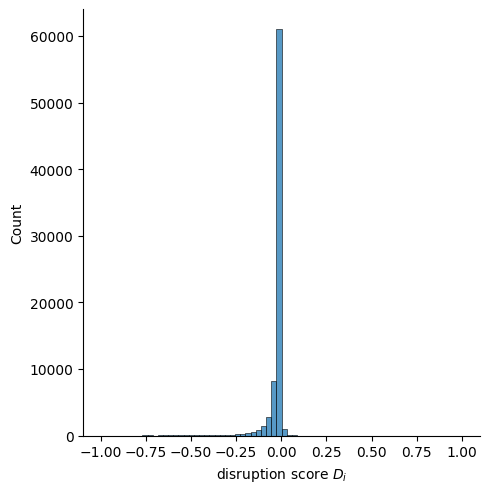

In [63]:
sn.displot(ds10_ds['all_ds'],bins=70,)
# plt.xlim(-0.000001,1.1)
# plt.xscale('log')
plt.xlabel(r"disruption score $D_i$")
# plt.xticks([0.00001,0.0001, 0.001, 0.01, 0.1, 0, 10, 100,1000])

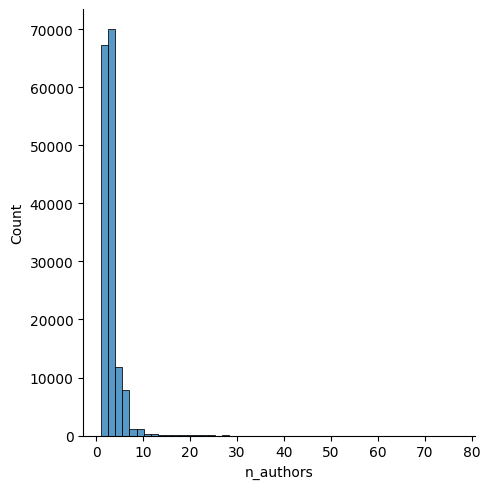

In [139]:
sn.displot(top52['n_authors'],bins=50)

In [24]:
n_8 = top52[(top52['n_authors']<=8) & (top52['year']>=1950)]

/var/folders/5l/2d23jjhs3zjdnkx4dld_ppyh0000gn/T/ipykernel_16047/3971739548.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n_8 = top52[(ds10_ds['n_authors']<=8) & (ds10_ds['year']>=2000)]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

Text(0.5, 0, 'team size')

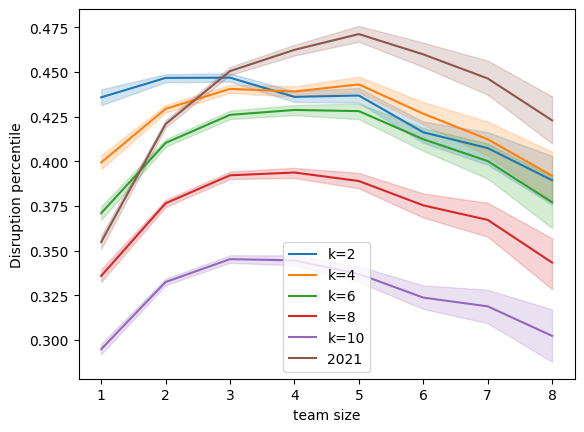

In [59]:
sn.lineplot(x= n_8['n_authors'], y=n_8['w2_percn'],label='k=2')
sn.lineplot(x= n_8['n_authors'], y=n_8['w4_percn'],label='k=4')
sn.lineplot(x= n_8['n_authors'], y=n_8['w6_percn'],label='k=6')
sn.lineplot(x= n_8['n_authors'], y=n_8['w8_percn'],label='k=8')
sn.lineplot(x= n_8['n_authors'], y=n_8['w10_percn'],label='k=10')
sn.lineplot(x= n_8['n_authors'], y=n_8['all_percn'],label='2021')
plt.ylabel('Disruption percentile')
plt.xlabel('team size')

In [233]:
ds20 = top52[(top52['year']<=2001)]

In [93]:
top52['year'].min()

1954.0

In [271]:
ds10 = top52[(top52['year']<=2010)]

In [131]:
ds20 = ds20[~ds20['w8_percn'].isna()]

In [87]:
ds20 = top52[(top52['year']<=2010)]
doids = ds20.melt(id_vars=['doi','year','n_authors','cc'],value_vars=['w2_percn','w4_percn','w6_percn','w8_percn','w10_percn'],var_name = 'w',value_name='percn')

In [69]:
ds10_ds = ds20[ds10_ds['w2_ds']!=0]
ds10_ds = ds10_ds[ds10_ds['w4_ds']!=0]
ds10_ds = ds10_ds[ds10_ds['w6_ds']!=0]
ds10_ds = ds10_ds[ds10_ds['w8_ds']!=0]
ds10_ds = ds10_ds[ds10_ds['w10_ds']!=0]

In [67]:
ds10_ds['year'].max()

2010.0

In [70]:
# ds20 = ds10_ds[(ds10_ds['year']<=2010)]
doids = ds20.melt(id_vars=['doi','year','n_authors','cc'],value_vars=['w2_ds','w4_ds','w6_ds','w8_ds','w10_ds','all_ds'],var_name = 'w',value_name='ds')

<AxesSubplot:xlabel='w', ylabel='percn'>

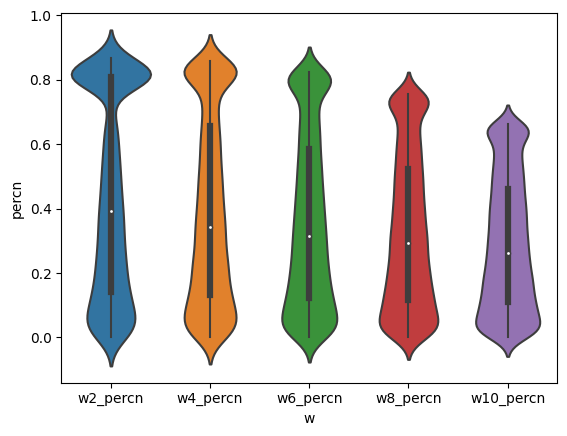

In [275]:
sn.violinplot(doids[doids['n_authors']==1], y='percn',x='w',scale='area')

In [274]:
doids.head()

,doi,year,n_authors,cc,w,percn
0,10.1007/bf00127822,1988.0,1,132,w2_percn,0.024793
1,10.1145/1810891.1810910,2010.0,1,36,w2_percn,0.019722
2,10.1016/0004-3702(86)90067-6,1986.0,2,78,w2_percn,0.110905
3,10.1109/mc.1986.1663098,1986.0,2,21,w2_percn,0.809525
4,10.1145/63526.63532,1989.0,1,366,w2_percn,0.040910


(-0.05, 0.05)

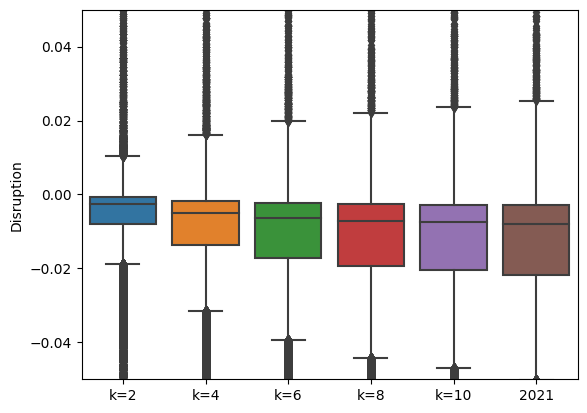

In [71]:
fig, ax = plt.subplots()
sn.boxplot(ax=ax,data = doids, y='ds',x='w')
ax.set_xticklabels(['k=2','k=4','k=6','k=8','k=10','2021'])
plt.ylabel("Disruption")
plt.xlabel(r'')
# plt.ylim(-0.1,1.1)
plt.ylim(-0.05,0.05)

(-0.05, 0.05)

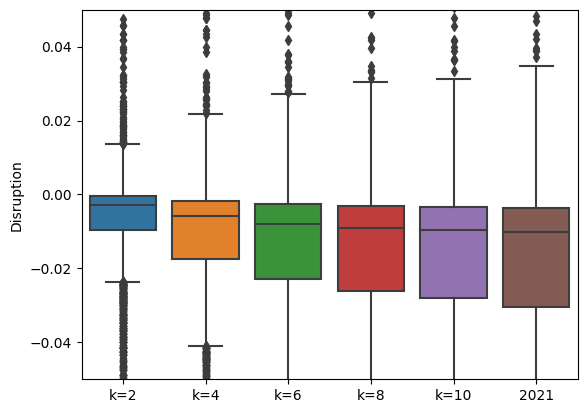

In [64]:
fig, ax = plt.subplots()
sn.boxplot(ax=ax,data = doids[(doids['n_authors']==1) & (doids['ds']<1)], y='ds',x='w')
ax.set_xticklabels(['k=2','k=4','k=6','k=8','k=10','2021'])
plt.ylabel("Disruption")
plt.xlabel(r'')
# plt.ylim(-0.1,1.1)
plt.ylim(-0.05,0.05)

(-0.05, 0.05)

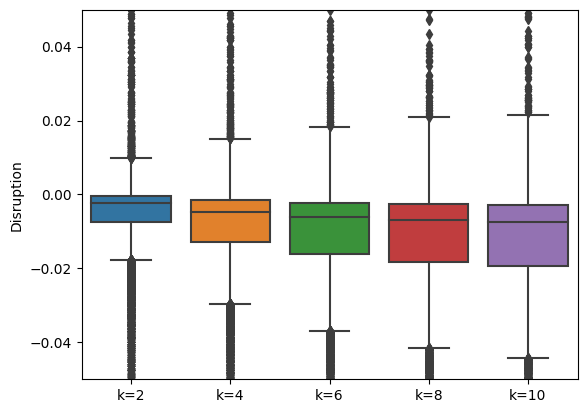

In [59]:
fig, ax = plt.subplots()

sn.boxplot(data = doids[(doids['n_authors']==2) & (doids['ds']<0.8)], y='ds',x='w')
ax.set_xticklabels(['k=2','k=4','k=6','k=8','k=10',''])
plt.ylabel("Disruption")
plt.xlabel(r'')
# plt.ylim(-0.1,0.1)
plt.ylim(-0.05,0.05)

(-0.1, 0.1)

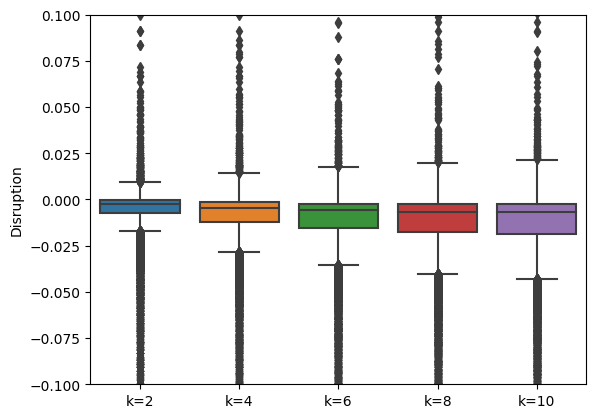

In [28]:
fig, ax = plt.subplots()

sn.boxplot(data = doids[doids['n_authors']==3], y='ds',x='w')
plt.ylim(-0.1,1.1)
ax.set_xticklabels(['k=2','k=4','k=6','k=8','k=10'])
plt.ylabel("Disruption")
plt.xlabel(r'')
plt.ylim(-0.1,0.1)

(-0.1, 0.2)

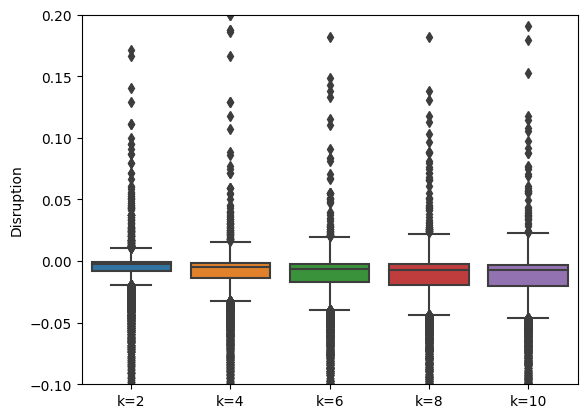

In [29]:
fig, ax = plt.subplots()

sn.boxplot(doids[doids['n_authors']==4], y='ds',x='w')
plt.ylim(-0.1,1.1)
ax.set_xticklabels(['k=2','k=4','k=6','k=8','k=10'])
plt.ylabel("Disruption")
plt.xlabel(r'')
plt.ylim(-0.1,0.2)

(-0.1, 0.1)

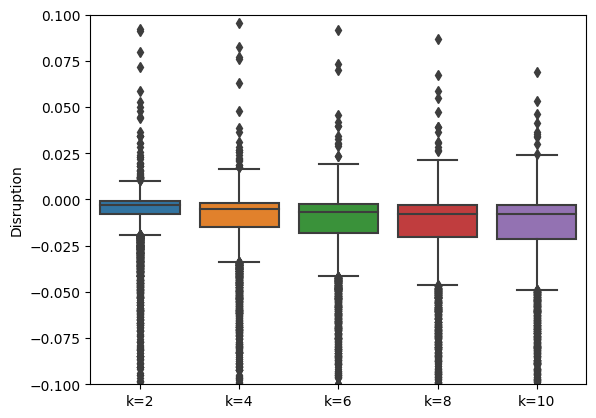

In [30]:
fig, ax = plt.subplots()

sn.boxplot(doids[doids['n_authors']==5], y='ds',x='w')
plt.ylim(-0.1,1.1)
ax.set_xticklabels(['k=2','k=4','k=6','k=8','k=10'])
plt.ylabel("Disruption")
plt.xlabel(r'')
plt.ylim(-0.1,0.1)

(-0.1, 0.1)

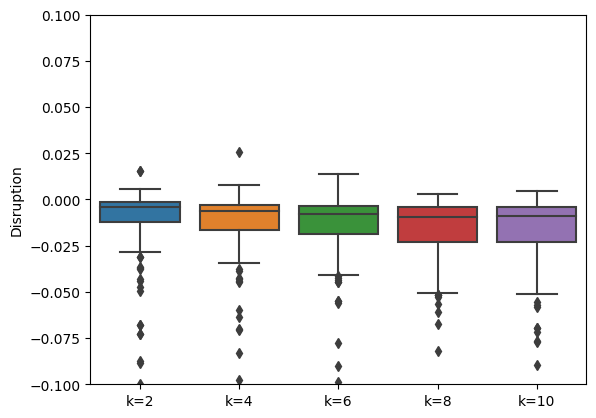

In [31]:
fig, ax = plt.subplots()

sn.boxplot(doids[doids['n_authors']==10], y='ds',x='w')
plt.ylim(-0.1,1.1)
ax.set_xticklabels(['k=2','k=4','k=6','k=8','k=10'])
plt.ylabel("Disruption")
plt.xlabel(r'')
plt.ylim(-0.1,0.1)

(-0.1, 0.1)

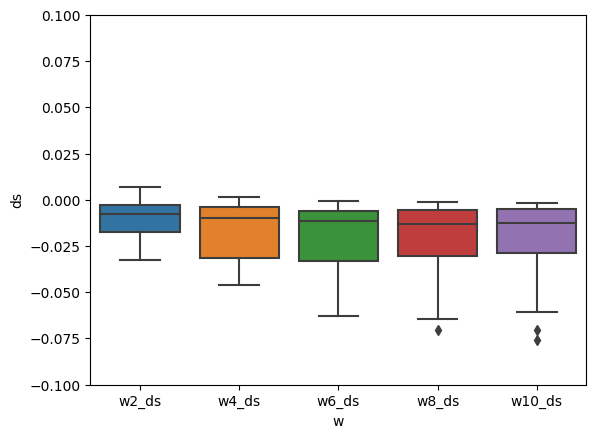

In [32]:
sn.boxplot(doids[doids['n_authors']==15], y='ds',x='w')
plt.ylim(-0.1,0.1)

In [194]:
top52[top52['w10_ds'].isna()]

,title,year,keywords,authors,fos,doi,venue,venue_name,n_authors,all_ds,...,w4_percn,w6_ds,w6_percn,w8_ds,w8_percn,w10_ds,w10_percn,w12_ds,w12_percn,cc
152,FreeSurfer.,2012.0,[],"[{'_id': '5487ec66dabfae8a11fb3eb2', 'name': '...",NaN,10.1016/j.neuroimage.2012.01.021,"{'_id': '555036be7cea80f95414fef2', 'raw': 'Ne...",NeuroImage,1,-0.031504,...,0.274949,-0.020743,0.179690,-0.030974,0.133476,NaN,NaN,NaN,NaN,467
153,FSL.,2012.0,[],"[{'_id': '560175f345cedb3395e5a447', 'name': '...",NaN,10.1016/j.neuroimage.2011.09.015,"{'_id': '555036be7cea80f95414fef2', 'raw': 'Ne...",NeuroImage,5,-0.205087,...,0.031324,-0.147230,0.023134,-0.201794,0.018436,NaN,NaN,NaN,NaN,670
4654,Semi-Supervised Hyperspectral Image Classifica...,2013.0,"['optimisation', 'ss-lapsvm', 'pattern cluster...","[{'_id': '56017dbb45cedb3395e6408f', 'name': '...","['Hyperspectral image classification', 'Small ...",10.1109/lgrs.2013.2273792,"{'_id': '555036b87cea80f95414c3a4', 'type': '0...",IEEE Geosci. Remote Sensing Lett.,4,-0.010764,...,0.344798,-0.010345,0.309084,-0.010764,0.308506,NaN,NaN,NaN,NaN,32
5634,Evaluating altmetrics,2014.0,"['web citation analysis research', 'altmetric ...","[{'_id': '53f42e48dabfaedd74d4287c', 'name': '...",NaN,10.1007/s11192-013-1117-2,"{'_id': '54825ad4582fc50b5e1557fe', 'type': '0...",Scientometrics,2,-0.057407,...,0.075245,-0.059925,0.062129,NaN,NaN,NaN,NaN,NaN,NaN,59
5829,Experiment databases,2012.0,"['Experimental methodology', 'Machine learning...","[{'_id': '53f42d6bdabfaeb22f408b91', 'name': '...",NaN,10.1007/s10994-011-5277-0,"{'_id': '5736b298d39c4f40a799f34e', 'type': '1...",Inductive Databases and Constraint-Based Data ...,4,-0.001083,...,0.758154,-0.000888,0.728587,-0.001084,0.668480,NaN,NaN,NaN,NaN,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279071,A discrete firefly algorithm to solve a rich v...,2017.0,NaN,"[{'name': 'Eneko Osaba', 'org': 'middlesex uni...","['Simulated annealing', 'Mathematical optimiza...",10.1007/s00500-016-2114-1,"{'sid': '1123077274', 'name': 'Soft Computing'...",soft computing,6,-0.000810,...,0.724797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
5322348,Supply chain network operations management of ...,2012.0,NaN,"[{'name': 'Anna Nagurney', 'org': 'University ...","['Blood supply', 'Computer science', 'Service ...",10.1007/s10287-011-0133-z,"{'sid': '28822639', 'name': 'Computational Man...",Computational Management Science,3,-0.013233,...,0.397250,-0.006623,0.404560,-0.013233,0.269499,NaN,NaN,NaN,NaN,21
5323137,Engineering social contagions: Optimal network...,2013.0,NaN,"[{'name': 'Sinan Aral', 'org': 'MIT Sloan Scho...","['Population', 'Viral marketing', 'Social netw...",10.1017/nws.2013.6,"{'sid': '2530642067', 'name': 'Network Science...",Network Science,3,-0.001104,...,0.753797,-0.000765,0.738470,-0.001104,0.667328,NaN,NaN,NaN,NaN,20
5323330,The conundrum of sharing research data,2012.0,NaN,"[{'name': 'Christine L. Borgman', 'org': 'UCLA...","['Data science', 'Incentive', 'Computer scienc...",10.1002/asi.22634,"{'sid': '80113298', 'name': 'Journal of the As...",Journal of the Association for Information Sci...,1,-0.007205,...,0.469906,-0.005210,0.456098,-0.006548,0.407695,NaN,NaN,NaN,NaN,85


### t-test

In [72]:
#### t-test
ws = ['w2_ds','w4_ds','w6_ds','w8_ds','w10_ds','w12_ds','w14_ds','w16_ds','w18_ds','w20_ds','all_ds']
res = []
for i, w1 in enumerate(ws):
    for j in range(i+1, len(ws)):
        print(w1)
        print(ws[j])
        w2 = ws[j]
        t_val, p_val = ttest_ind(a=ds10_ds[~ds10_ds[w2].isna()][w1],b=ds10_ds[~ds10_ds[w2].isna()][w2],nan_policy='omit')
        print("t-value = ", t_val)
        print("p-value = ", p_val)
        d = {'w1':w1,
            'w2':w2,
            'ttest':np.round(t_val,decimals=2),
            'p_val':np.round(p_val,decimals=3)}
        res.append(d)

w2_ds
w4_ds
t-value =  20.417086139254977
p-value =  1.638855051613637e-92
w2_ds
w6_ds
t-value =  30.61238640017775
p-value =  4.387044464547594e-205
w2_ds
w8_ds
t-value =  35.945326395639555
p-value =  1.3846633721266218e-281
w2_ds
w10_ds
t-value =  38.97344260923013
p-value =  0.0
w2_ds
w12_ds
t-value =  38.683823403022814
p-value =  0.0
w2_ds
w14_ds
t-value =  34.65645559640994
p-value =  2.944568437093304e-261
w2_ds
w16_ds
t-value =  29.3608224262858
p-value =  6.287730514269948e-188
w2_ds
w18_ds
t-value =  22.406160097479738
p-value =  2.913443551547084e-110
w2_ds
w20_ds
t-value =  15.631425771923505
p-value =  1.4543461915154534e-54
w2_ds
all_ds
t-value =  41.73168446122015
p-value =  0.0
w4_ds
w6_ds
t-value =  10.542476845528046
p-value =  5.635333928670974e-26
w4_ds
w8_ds
t-value =  16.222610611288026
p-value =  3.9819844971045693e-59
w4_ds
w10_ds
t-value =  19.547259662444105
p-value =  5.742257401085596e-85
w4_ds
w12_ds
t-value =  20.7094804402324
p-value =  4.264110023700849

In [97]:
pd.DataFrame(res).pivot(index='w1',columns='w2',values='ttest').reset_index()

w2,w1,all_ds,w10_ds,w12_ds,w14_ds,w16_ds,w18_ds,w20_ds,w4_ds,w6_ds,w8_ds
0,w10_ds,-0.41,NaN,4.58,7.84,10.22,11.84,13.14,NaN,NaN,NaN
1,w12_ds,-11.76,NaN,NaN,3.22,5.65,7.46,8.94,NaN,NaN,NaN
2,w14_ds,-22.14,NaN,NaN,NaN,2.36,4.27,5.79,NaN,NaN,NaN
3,w16_ds,-30.87,NaN,NaN,NaN,NaN,1.85,3.33,NaN,NaN,NaN
4,w18_ds,-37.82,NaN,NaN,NaN,NaN,NaN,1.39,NaN,NaN,NaN
5,w20_ds,-41.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,w2_ds,74.71,61.27,62.63,61.64,59.41,56.11,53.17,32.21,48.80,57.14
7,w4_ds,46.23,33.19,36.76,38.17,38.55,37.56,36.71,NaN,17.57,27.50
8,w6_ds,27.63,16.70,21.00,23.68,25.28,25.56,25.77,NaN,NaN,10.34
9,w8_ds,12.58,6.49,11.08,14.15,16.32,17.40,18.33,NaN,NaN,NaN


In [65]:
pd.DataFrame(res).pivot(index='w1',columns='w2',values='ttest')

w2,all_ds,w10_ds,w12_ds,w14_ds,w16_ds,w18_ds,w20_ds,w4_ds,w6_ds,w8_ds
w1,,,,,,,,,,
w10_ds,-0.41,NaN,10.94,20.98,29.52,36.40,39.95,NaN,NaN,NaN
w12_ds,-11.76,NaN,NaN,10.10,18.78,25.85,29.71,NaN,NaN,NaN
w14_ds,-22.14,NaN,NaN,NaN,8.76,15.97,20.11,NaN,NaN,NaN
w16_ds,-30.87,NaN,NaN,NaN,NaN,7.30,11.65,NaN,NaN,NaN
w18_ds,-37.82,NaN,NaN,NaN,NaN,NaN,4.48,NaN,NaN,NaN
w20_ds,-41.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w2_ds,74.71,74.63,83.40,91.24,97.99,103.04,105.24,32.43,50.92,64.05
w4_ds,46.23,45.62,55.55,64.47,71.96,77.72,80.22,NaN,19.40,33.80
w6_ds,27.63,27.20,37.72,47.25,55.24,61.49,64.35,NaN,NaN,14.83


In [214]:
doids.sort_values(by=['percn','cc'],ascending=False)

,doi,year,n_authors,cc,w,percn
18417,10.1145/320544.320546,1977.0,2,391,w2_percn,0.866745
13853,10.1109/tip.2000.826791,2000.0,2,213,w2_percn,0.866745
18952,10.1109/49.285304,1994.0,1,60,w2_percn,0.866745
12760,10.1016/0167-6393(88)90053-2,1988.0,1,27,w2_percn,0.866745
19197,10.1109/pgec.1967.264664,1967.0,2,20,w2_percn,0.866745
...,...,...,...,...,...,...
205095,10.1016/0168-0072(83)90038-6,1983.0,1,199,w10_percn,0.000011
97633,10.1016/s0740-624x(01)00066-1,2001.0,2,284,w6_percn,0.000000
140896,10.1016/s0740-624x(01)00066-1,2001.0,2,284,w8_percn,0.000000
184159,10.1016/s0740-624x(01)00066-1,2001.0,2,284,w10_percn,0.000000


In [230]:
ds20

,title,year,keywords,authors,fos,doi,venue,venue_name,n_authors,all_ds,...,w4_percn,w6_ds,w6_percn,w8_ds,w8_percn,w10_ds,w10_percn,w12_ds,w12_percn,cc
142,Focusing,1988.0,[],"[{'name': 'Eric Krotkov', 'sid': '23362393', '...",NaN,10.1007/bf00127822,"{'_id': '548267b8582fc50b5e32e70f', 'raw': 'In...",International Journal of Computer Vision,1,-0.336391,...,0.060794,-0.082645,0.043932,-0.117647,0.033741,-0.129412,0.032265,-0.168421,0.024112,132
1068,Counterfactuals,1986.0,"['logical language', 'commonsense non-monotoni...","[{'_id': '53f430fcdabfaee4dc747309', 'name': '...",NaN,10.1016/0004-3702(86)90067-6,"{'_id': '555036e77cea80f9541662c7', 'raw': 'Ar...",Artif. Intell.,2,-0.035907,...,0.144543,-0.027140,0.140278,-0.023622,0.170612,-0.024485,0.165141,-0.028604,0.136271,78
2124,LisaLearning,1986.0,['first page'],"[{'name': 'John M. Carroll', 'org': 'IBM T. J....",NaN,10.1109/mc.1986.1663098,"{'_id': '53a7319520f7420be8d50933', 'raw': 'IE...",IEEE Computer,2,-0.009091,...,0.816596,-0.017857,0.204856,-0.009569,0.331607,-0.016807,0.220686,-0.015504,0.214560,21
2201,Micropipelines,1989.0,"['conceptual framework', 'elastic pipeline', '...","[{'_id': '53f57f4bdabfaea1c1f8045b', 'name': '...",NaN,10.1145/63526.63532,"{'_id': '555036f57cea80f954169e28', 'raw': 'Co...",Commun. ACM,1,-0.210021,...,0.041748,-0.084507,0.042872,-0.134100,0.029189,-0.138801,0.030048,-0.145183,0.028632,366
2208,Metacomputing,1992.0,[],"[{'_id': '53f47015dabfaee02adbad47', 'name': '...",NaN,10.1145/129888.129890,"{'_id': '555036f57cea80f954169e28', 'raw': 'Co...",Commun. ACM,2,-0.970874,...,0.000946,-0.896552,0.000400,-0.930233,0.000308,-0.944444,0.000281,-0.955882,0.000178,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5229364,"High performance connected digit recognition, ...",1988.0,NaN,"[{'name': 'Lawrence R. Rabiner', '_id': '5631b...","['Reference patterns', 'Signal processing', 'M...",10.1109/icassp.1988.196526,"{'sid': 'conf/icassp', 't': 'C', 'raw': 'ICASSP'}",conf/icassp,3,-0.027864,...,0.053106,-0.047244,0.079932,-0.040000,0.104542,-0.034682,0.121507,-0.031250,0.126778,21
5237759,A unified approach for calculating error rates...,1998.0,NaN,"[{'name': 'Mohamed-Slim Alouini'}, {'name': 'A...",NaN,10.1109/icc.1998.682896,"{'sid': 'conf/icc', 't': 'C', 'raw': 'ICC'}",conf/icc,2,-0.003391,...,0.203445,-0.011169,0.293390,-0.008813,0.347945,-0.007191,0.364937,-0.006170,0.346609,23
5237768,Computationally efficient optimal power alloca...,1998.0,NaN,"[{'name': 'Brian S. Krongold', '_id': '5631780...",NaN,10.1109/icc.1998.685166,"{'sid': 'conf/icc', 't': 'C', 'raw': 'ICC'}",conf/icc,3,-0.003635,...,0.306122,-0.006560,0.406322,-0.005140,0.455082,-0.003674,0.473241,-0.003277,0.425633,26
5237779,Minimum energy mobile wireless networks.,1998.0,NaN,"[{'name': 'Volkan Rodoplu', '_id': '53f4308eda...",NaN,10.1109/icc.1998.683107,"{'sid': 'conf/icc', 't': 'C', 'raw': 'ICC'}",conf/icc,2,-0.088843,...,0.312944,-0.103825,0.034357,-0.091954,0.044116,-0.102804,0.041293,-0.100000,0.042364,61


In [398]:
ds20.head()

,title,year,keywords,authors,fos,doi,venue,venue_name,n_authors,all_ds,...,w12_percn,cc,w14_ds,w14_percn,w16_ds,w16_percn,w18_ds,w18_percn,w20_ds,w20_percn


In [402]:
dsids = ds20.melt(id_vars=['doi','year','n_authors','cc'],value_vars=['w2_ds','w4_ds','w6_ds','w8_ds','w10_ds','w12_ds','w14_ds','w14_ds','w16_ds','w18_ds','w20_ds'],var_name = 'w',value_name='ds')

In [403]:
dsids.head()

,doi,year,n_authors,cc,w,ds
0,10.1007/bf00127822,1988.0,1,132,w2_ds,-0.075949
1,10.1145/1810891.1810910,2010.0,1,36,w2_ds,-0.093750
2,10.1016/0004-3702(86)90067-6,1986.0,2,78,w2_ds,-0.017857
3,10.1109/mc.1986.1663098,1986.0,2,21,w2_ds,0.000000
4,10.1145/63526.63532,1989.0,1,366,w2_ds,-0.047297


In [111]:
dsids = ds20.melt(id_vars=['doi','year','n_authors','cc'],value_vars=['w2_ds','w4_ds','w6_ds','w8_ds','w10_ds'],var_name = 'w',value_name='ds')

In [113]:
dsids.sort_values(by=['ds','cc'],ascending=False).head(60)

,doi,year,n_authors,cc,w,ds
50371,10.1145/320544.320546,1977.0,2,391,w2_ds,1.0
163786,10.1145/320544.320546,1977.0,2,391,w4_ds,1.0
277201,10.1145/320544.320546,1977.0,2,391,w6_ds,1.0
390616,10.1145/320544.320546,1977.0,2,391,w8_ds,1.0
504031,10.1145/320544.320546,1977.0,2,391,w10_ds,1.0
37576,10.1109/tip.2000.826791,2000.0,2,213,w2_ds,1.0
150991,10.1109/tip.2000.826791,2000.0,2,213,w4_ds,1.0
264406,10.1109/tip.2000.826791,2000.0,2,213,w6_ds,1.0
377821,10.1109/tip.2000.826791,2000.0,2,213,w8_ds,1.0
491236,10.1109/tip.2000.826791,2000.0,2,213,w10_ds,1.0


In [114]:
dsids[(dsids['ds']>0.5) & (dsids['ds']<1)].drop_duplicates(subset=['doi','year']).sort_values(by=['cc','ds'],ascending=False)

,doi,year,n_authors,cc,w,ds
278923,10.1109/ccgrid.2001.923162,1999.0,3,268,w6_ds,0.660606
473789,10.1109/tcom.1980.1094702,1980.0,1,261,w10_ds,0.537879
2995,10.1109/tit.1962.1057786,1962.0,2,156,w2_ds,0.750000
157962,10.1109/isit.2009.5205856,2009.0,2,106,w4_ds,0.567164
566350,10.1109/40.755464,1999.0,14,103,w10_ds,0.543210
71199,10.1109/iros.2005.1545521,2005.0,5,83,w2_ds,0.555556
411170,10.1016/j.apal.2004.04.009,2005.0,1,78,w8_ds,0.522388
393225,10.1162/neco.1990.2.2.239,1990.0,1,66,w8_ds,0.520000
519355,10.1109/4233.737581,1998.0,5,63,w10_ds,0.525000
418830,10.1109/glocom.1999.831780,1999.0,6,52,w8_ds,0.542857


### change in disruption measure

In [ ]:
# Is there any article that changed for negative to positive disruption or vice-versa

In [115]:
ds20 = top52[(top52['year']<=2010)]

In [116]:
ds20 = ds20[~ds20['w10_ds'].isna()]
ds20 = ds20[~ds20['w8_ds'].isna()]

In [117]:
doids = ds20.melt(id_vars=['doi','year','n_authors','cc'],value_vars=['w2_percn','w4_percn','w6_percn','w8_percn','w10_percn'],var_name = 'w',value_name='percn')

In [298]:
ds10[ds10['diff_w2_w10']>0].sort_values(by=['cc','diff_w2_w10'], ascending=False)

,title,year,keywords,authors,fos,doi,venue,venue_name,n_authors,all_ds,...,cc,w14_ds,w14_percn,w16_ds,w16_percn,w18_ds,w18_percn,w20_ds,w20_percn,diff_w2_w10
1730343,Wireless sensor networks: a survey,2002.0,"['Wireless sensor networks', 'Ad hoc networks'...","[{'_id': '53f469d4dabfaee4dc85be38', 'name': '...",['Key distribution in wireless sensor networks...,10.1016/s1389-1286(01)00302-4,"{'_id': '53907df520f770854f6106bd', 'type': '0...",Computer Networks,4,0.107546,...,4305,0.088127,0.528164,0.099975,0.419743,0.107222,0.335115,NaN,NaN,6.956068e-02
2419457,User cooperation diversity-part I: system desc...,2003.0,"['Fading', 'Quality of service', 'Diversity me...","[{'_id': '53f4745cdabfaee02adcbf07', 'name': '...","['Relay channel', 'Antenna diversity', 'Teleco...",10.1109/tcomm.2003.818096,"{'sid': '26', 'issn': '0090-6778', 'online_iss...",IEEE Transactions on Communications,3,0.084967,...,3046,0.083837,0.528039,0.084962,0.419581,0.084967,0.334847,NaN,NaN,6.900323e-02
1972930,Space-time block codes from orthogonal designs,1999.0,"['diversity', 'decoding delay', 'orthogonal de...","[{'_id': '53f42e9edabfaeb2acffa0f9', 'name': '...","['Space–time code', 'Telecommunications', 'Fad...",10.1109/18.771146,"{'_id': '54824fa4582fc50b5e02e699', 'type': '0...",IEEE Transactions on Information Theory,3,-0.037831,...,2657,-0.040691,0.107865,-0.038155,0.100151,-0.037593,0.088439,-0.037691,0.075592,9.061619e-03
2813835,Nearest neighbor pattern classification,1967.0,['Pattern classification'],"[{'_id': '53f42be8dabfaedd74d2063c', 'name': '...","['k-nearest neighbors algorithm', 'Combinatori...",10.1109/tit.1967.1053964,"{'_id': '55f8e06cc35f4f6dfd41602e', 'type': '1...","Information Theory, IEEE Transactions",2,-0.932331,...,2554,-0.690000,0.002944,-0.650943,0.003349,-0.666667,0.003093,-0.666667,0.002688,1.162393e-01
405548,Shape Matching and Object Recognition Using Sh...,2002.0,"['handwritten character recognition', 'image m...","[{'_id': '53f48dd3dabfaea7cd1d479a', 'name': '...","['Computer vision', 'GLOH', 'Pattern recogniti...",10.1109/34.993558,"{'_id': '555036e37cea80f954164af5', 'name_d': ...",IEEE Transactions on Pattern Analysis and Mach...,3,0.017870,...,2210,0.017813,0.523486,0.018668,0.415565,0.017855,0.331180,NaN,NaN,1.685920e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425829,Self-adaptive blind source separation based on...,2004.0,"['exponential generative model', 'activation f...","[{'_id': '53f42ad7dabfaeb1a7b69a30', 'name': '...","['Exponential function', 'Pattern recognition'...",10.1109/tnn.2004.824420,"{'_id': '572dd9f7d39c4f499348ba05', 'name_d': ...",IEEE Transactions on Neural Networks,3,-0.001395,...,18,-0.001449,0.470757,-0.001397,0.378533,NaN,NaN,NaN,NaN,6.123090e-06
2468367,Fast algorithms for mutual information based i...,2004.0,"['binning technique', 'independent component a...","[{'_id': '53f44b45dabfaec09f1dc62b', 'name': '...","['Entropy estimation', 'Regular grid', 'Patter...",10.1109/tsp.2004.834398,"{'_id': '5390b4d520f70186a0eff65e', 'raw': 'IE...",IEEE Transactions on Signal Processing - Part I,1,-0.000572,...,18,-0.000584,0.495073,-0.000573,0.393893,NaN,NaN,NaN,NaN,5.265426e-06
1114427,Global Gaussian approach for scene categorizat...,2010.0,"['image classification', 'linear approximation...","[{'_id': '54057f8bdabfae92b41dc085', 'name': '...","['Information geometry', 'Feature vector', 'Pa...",10.1109/cvpr.2010.5539921,"{'_id': '53a7256420f7420be8b4e0aa', 'name_d': ...",Computer Vision and Pattern Recognition,3,-0.001151,...,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.049723e-06
2225379,An effective neuro-fuzzy paradigm for machiner...,2001.0,"['computer networks', 'fuzzy neural network', ...","[{'_id': '5484b6a4dabfae9b40133067', 'name': '...","['Data mining', 'Neuro-fuzzy', 'Fault detectio...",10.1109/3477.938258,"{'_id': '53a72feb20f7420be8ccc8ff', 'type': '0...","IEEE Transactions on Systems, Man, and Cyberne...",2,-0.000307,...,18,-0.000394,0.498603,-0

In [313]:
ds10[ds10['diff_w2_w10']<0].sort_values(by=['cc','diff_w2_w10'], ascending=False)

,title,year,keywords,authors,fos,doi,venue,venue_name,n_authors,all_ds,...,cc,w14_ds,w14_percn,w16_ds,w16_percn,w18_ds,w18_percn,w20_ds,w20_percn,diff_w2_w10
2387862,Image quality assessment: from error visibilit...,2004.0,"['distorted image', 'quality assessment', 'hum...","[{'_id': '5448472edabfae87b7dfd01a', 'name': '...","['Computer vision', 'Cyclopean image', 'Human ...",10.1109/tip.2003.819861,"{'_id': '555036f27cea80f954168664', 'type': '0...",IEEE Transactions on Image Processing,4,-0.400874,...,6543,-0.353783,0.011107,-0.398735,0.008862,NaN,NaN,NaN,NaN,-0.218618
1955375,A fast and elitist multiobjective genetic algo...,2002.0,"['genetic algorithms', 'multi-objective evolut...","[{'_id': '54484da3dabfae87b7e038be', 'name': '...","['Mathematical optimization', 'Evolutionary al...",10.1109/4235.996017,"{'_id': '5696ac7eb0b7fae0fc5048a0', 'type': '1...",IEEE Transactions on Evolutionary Computation,4,-0.433213,...,6349,-0.385688,0.009835,-0.409731,0.008482,-0.432558,0.007153,NaN,NaN,-0.258776
50699,Particle swarm optimization,1995.0,[],"[{'_id': '53f4508edabfaee2a1d5d01e', 'name': '...",NaN,10.1109/icnn.1995.488968,"{'type': '12', 'raw': 'Encyclopedia of Machine...",Encyclopedia of Machine Learning and Data Mining,2,-0.630867,...,6184,-0.503331,0.006274,-0.578174,0.004490,-0.612785,0.003773,-0.627853,0.0031,-0.202394
8460,Compressed Sensing.,2006.0,"["". integrated sensing and processing. optimal...","[{'_id': '53f45177dabfaee02ad45f0b', 'name': '...",NaN,10.1109/tit.2006.871582,"{'_id': '555036b37cea80f954149ffa', 'type': '0...","Computer Vision, A Reference Guide",1,-0.126476,...,5628,-0.125630,0.037182,NaN,NaN,NaN,NaN,NaN,NaN,-0.093416
2078587,Cooperative diversity in wireless networks: Ef...,2003.0,"['space constraint', 'wireless network', 'fadi...","[{'_id': '53f438fcdabfaedd74db93ae', 'name': '...","['Diversity gain', 'Wireless network', 'Antenn...",10.1109/tit.2004.838089,"{'_id': '54824fa4582fc50b5e02e699', 'type': '0...",IEEE Transactions on Information Theory,3,-0.127878,...,5565,-0.122909,0.038105,-0.126473,0.033602,-0.127878,0.030309,NaN,NaN,-0.089852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100783,Stream-based cipher feedback mode in wireless ...,2009.0,"['voice traffic', 'optimal throughput', 'crypt...","[{'gid': '5b8692dfe1cd8e14a35bc056', '_id': '5...","['Transposition cipher', 'Cipher', 'Computer s...",10.1109/twc.2009.071278,"{'_id': '548261ae582fc50b5e240dd1', 'name_d': ...",IEEE Transactions on Wireless Communications,4,-0.900000,...,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.566667
1274239,Defining business process flexibility with the...,2007.0,"['invariant', 'business process', 'stability',...","[{'_id': '5606e46145cedb3396986ae7', 'name': '...","['Business process', 'Support system', 'Comput...",10.1002/spip.301,"{'_id': '54825f4f582fc50b5e1eff6a', 'name_d': ...",Software Process: Improvement and Practice,3,-0.387097,...,18,-0.387097,0.009804,NaN,NaN,NaN,NaN,NaN,NaN,-0.571429
1408184,Teaching and technology in higher education: s...,2002.0,"['student perception', 'ethno-religious backgr...","[{'_id': '54068ec4dabfae8faa60f38b', 'name': '...","['Student perceptions', 'Sociology', 'Business...",10.1016/s0360-1315(02)00042-8,"{'_id': '539ff061831432abcb3e2c51', 'type': '0...",Computers & Education,2,-0.720000,...,18,-0.681818,0.003062,-0.708333,0.002569,-0.720000,0.002407,NaN,NaN,-0.611111
1898992,Stable polyhedra in parameter space,2003.0,"['PID control', 'Robustness', 'Parameter space']","[{'_id': '53f457a9dabfaee2a1d78ec3', 'name': '...","['Characteristic polynomial', 'Polygon', 'Comb...",10.1016/s0005-1098(03)00034-7,"{'_id': '539e7a538314ff4cf4bd2168', 'type': '0...",Automatica,2,-0.900000,...,18,-0.888889,0.000842,-0.894737,0.000736,-0.900000,0.000680,NaN,NaN,-0.866667


In [143]:
ds20['diff_w2_w10'] = ds20['w10_ds'] - ds20['w2_ds']

In [168]:
ds20[ds20['diff_w2_w10']<0.1].sort_values(by=['year','cc'],ascending=False).head(10)[['title','doi','year','cc','w2_ds','w4_ds','w6_ds','w8_ds','w10_ds','all_ds','w2_percn','w10_percn','diff_w2_w10']]

,title,doi,year,cc,w2_ds,w4_ds,w6_ds,w8_ds,w10_ds,all_ds,w2_percn,w10_percn,diff_w2_w10
93033,Object Detection with Discriminatively Trained...,10.1109/tpami.2009.167,2010.0,2540,-0.007000,-0.018688,-0.024076,-0.029776,-0.032832,-0.032838,0.242684,0.127362,-0.025832
1818799,The Internet of Things: A survey,10.1016/j.comnet.2010.05.010,2010.0,2328,-0.020512,-0.065702,-0.108861,-0.151190,-0.177864,-0.178169,0.097211,0.022652,-0.157352
1252046,A view of cloud computing,10.1145/1721654.1721672,2010.0,2197,-0.588652,-0.690265,-0.714092,-0.718692,-0.721724,-0.722107,0.001352,0.002157,-0.133072
552974,The Pascal Visual Object Classes (VOC) Challenge,10.1007/s11263-009-0275-4,2010.0,2033,-0.005996,-0.011382,-0.015132,-0.021162,-0.030401,-0.031289,0.269753,0.136915,-0.024406
2390066,Data clustering: 50 years beyond K-means,10.1016/j.patrec.2009.09.011,2010.0,1339,-0.004261,-0.010686,-0.013829,-0.017340,-0.021261,-0.021368,0.333656,0.185004,-0.017000
2982771,Noncooperative Cellular Wireless with Unlimite...,10.1109/twc.2010.092810.091092,2010.0,1327,-0.007343,-0.029941,-0.071244,-0.112148,-0.122984,-0.123186,0.234526,0.034065,-0.115640
438952,A Singular Value Thresholding Algorithm for Ma...,10.1137/080738970,2010.0,1202,-0.004679,-0.010131,-0.013471,-0.018292,-0.020224,-0.020330,0.315918,0.192238,-0.015545
2130901,Image super-resolution via sparse representation.,10.1109/tip.2010.2050625,2010.0,1182,-0.009060,-0.016544,-0.019960,-0.023811,-0.025880,-0.025932,0.200212,0.157502,-0.016819
2983831,Differential Evolution: A Survey of the State-...,10.1109/tevc.2010.2059031,2010.0,1091,-0.021745,-0.037265,-0.044467,-0.046841,-0.050009,-0.050064,0.091734,0.085587,-0.028264
215952,Locality-constrained Linear Coding for image c...,10.1109/cvpr.2010.5540018,2010.0,1087,-0.009453,-0.023226,-0.028002,-0.030216,-0.029371,-0.029261,0.193157,0.141337,-0.019917


In [332]:
len(ds10[(ds10['w2_ds']<0) & (ds10['w10_ds']>0)])/len(ds10)

0.010607062557862717

In [333]:
len(ds10[(ds10['w2_ds']>0) & (ds10['w10_ds']<0)])/len(ds10)

0.06085614777586739

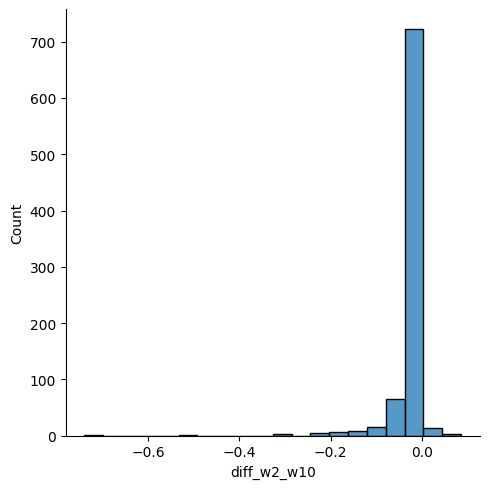

In [312]:
sn.displot(ds10[ds10['title'].str.contains('survey')]['diff_w2_w10'],bins=20)

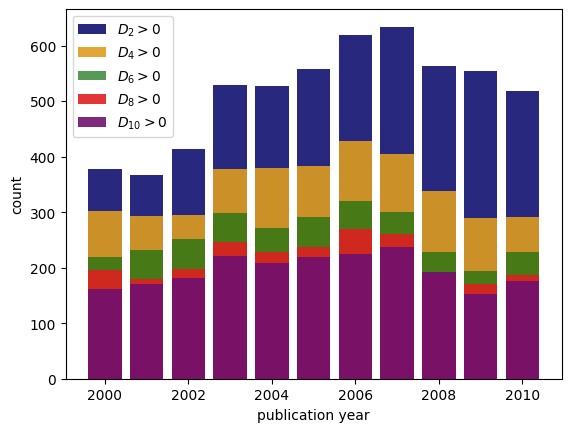

In [114]:
ds20['year'] = ds20['year'].map(int)
sn.countplot(data=ds20[(ds20['year']>=1990) & (ds20['w2_ds']>0)], x='year',color='navy',alpha=0.9,label=r'$D_2>0$')
sn.countplot(data=ds20[(ds20['year']>=1990) & (ds20['w4_ds']>0)], x='year',color='orange',alpha=0.9,label=r'$D_4>0$')
sn.countplot(data=ds20[(ds20['year']>=1990) & (ds20['w6_ds']>0)], x='year',color='green',alpha=0.7,label=r'$D_6>0$')
sn.countplot(data=ds20[(ds20['year']>=1990) & (ds20['w8_ds']>0)], x='year',color='red',alpha=0.9,label=r'$D_8>0$')
sn.countplot(data=ds20[(ds20['year']>=1990) & (ds20['w10_ds']>0)], x='year',color='purple',alpha=0.9,label=r'$D_{10}>0$')

plt.xticks(rotation=0)
plt.locator_params(axis='x', nbins=10)
plt.ylabel('count')
plt.xlabel('publication year')

plt.legend()
plt.show()

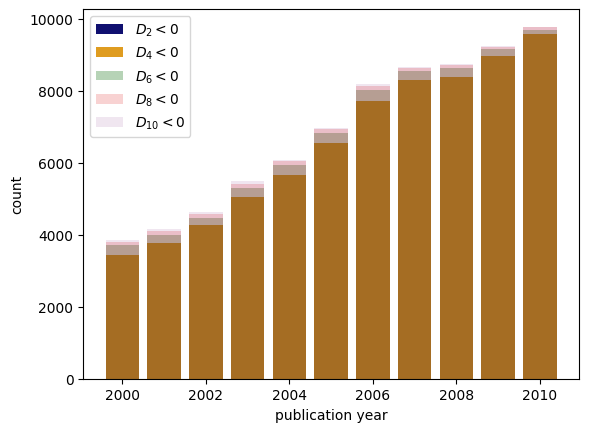

In [115]:
sn.countplot(data=ds20[(ds20['year']>=1990) & (ds20['w2_ds']<0)], x='year',color='navy',alpha=1,label=r'$D_2<0$')
sn.countplot(data=ds20[(ds20['year']>=1990) & (ds20['w4_ds']<0)], x='year',color='orange',alpha=1,label=r'$D_4<0$')
sn.countplot(data=ds20[(ds20['year']>=1990) & (ds20['w6_ds']<0)], x='year',color='green',alpha=0.3,label=r'$D_6<0$')
sn.countplot(data=ds20[(ds20['year']>=1990) & (ds20['w8_ds']<0)], x='year',color='red',alpha=0.2,label=r'$D_8<0$')
sn.countplot(data=ds20[(ds20['year']>=1990) & (ds20['w10_ds']<0)], x='year',color='purple',alpha=0.1,label=r'$D_{10}<0$')

plt.xticks(rotation=0)
plt.locator_params(axis='x', nbins=10)
plt.ylabel('count')
plt.xlabel('publication year')

plt.legend()
plt.show()

### bursts 

In [426]:
w2group = dsids[(dsids['w']=='w2_ds') & (dsids['ds']>=0.01)].groupby('year').agg({'w':'count'}).reset_index()
# w2group['year'] = w2group['year'].map(int)

In [427]:
w4group = dsids[(dsids['w']=='w4_ds') & (dsids['ds']>=0.01)].groupby('year').agg({'w':'count'}).reset_index()

In [428]:
w6group = dsids[(dsids['w']=='w6_ds') & (dsids['ds']>=0.01)].groupby('year').agg({'w':'count'}).reset_index()

In [429]:
w8group = dsids[(dsids['w']=='w8_ds') & (dsids['ds']>=0.01)].groupby('year').agg({'w':'count'}).reset_index()

In [430]:
w10group = dsids[(dsids['w']=='w10_ds') & (dsids['ds']>=0.01)].groupby('year').agg({'w':'count'}).reset_index()
w10group['year'] = w10group['year'].map(int)

In [419]:
dsids[(dsids['w']=='w2_ds') & (dsids['ds']>0.1)].groupby('year').agg({'ds':'count'}).reset_index()

,year,ds
0,1954.0,1
1,1956.0,1
2,1958.0,1
3,1959.0,1
4,1961.0,1
5,1962.0,5
6,1963.0,2
7,1965.0,3
8,1966.0,3
9,1967.0,2


### with relation to cc / yr

In [19]:
top5cites_yr['year'] = top5cites_yr['cited'].map(doi_year_map)

In [20]:
w2_cc = top5cites_yr[top5cites_yr['citing_pub_year'] <= top5cites_yr['year']+2].groupby('cited').agg({'citing':'sum'}).reset_index()

In [21]:
w2_cc = dict(zip(w2_cc['cited'],w2_cc['citing']))

In [22]:
w4_cc = top5cites_yr[top5cites_yr['citing_pub_year'] <= top5cites_yr['year']+4].groupby('cited').agg({'citing':'sum'}).reset_index()

In [23]:
w4_cc = dict(zip(w4_cc['cited'],w4_cc['citing']))

In [24]:
w6_cc = top5cites_yr[top5cites_yr['citing_pub_year'] <= top5cites_yr['year']+6].groupby('cited').agg({'citing':'sum'}).reset_index()

In [25]:
w6_cc = dict(zip(w6_cc['cited'],w6_cc['citing']))

In [26]:
w8_cc = top5cites_yr[top5cites_yr['citing_pub_year'] <= top5cites_yr['year']+8].groupby('cited').agg({'citing':'sum'}).reset_index()

In [27]:
w8_cc = dict(zip(w8_cc['cited'],w8_cc['citing']))

In [28]:
w10_cc = top5cites_yr[top5cites_yr['citing_pub_year'] <= top5cites_yr['year']+10].groupby('cited').agg({'citing':'sum'}).reset_index()

In [29]:
w10_cc = dict(zip(w10_cc['cited'],w10_cc['citing']))

In [99]:
len(w8_cc)

181156

In [100]:
len(w10_cc)

181375

In [30]:
top52['w2_cc'] = top52['doi'].map(w2_cc)
top52['w4_cc'] = top52['doi'].map(w4_cc)
top52['w6_cc'] = top52['doi'].map(w6_cc)
top52['w8_cc'] = top52['doi'].map(w8_cc)
top52['w10_cc'] = top52['doi'].map(w10_cc)

In [31]:
top52['delta_42'] = top52['w4_cc'] - top52['w2_cc']
top52['delta_64'] = top52['w6_cc'] - top52['w4_cc']
top52['delta_86'] = top52['w8_cc'] - top52['w6_cc']
top52['delta_108'] = top52['w10_cc'] - top52['w8_cc']


In [32]:
top52['delta_ds_42'] = top52['w4_ds'] - top52['w2_ds']
top52['delta_ds_64'] = top52['w6_ds'] - top52['w4_ds']
top52['delta_ds_86'] = top52['w8_ds'] - top52['w6_ds']
top52['delta_ds_108'] = top52['w10_ds'] - top52['w8_ds']


In [156]:
(len(top52[(top52['w2_ds']<0) &(top52['w10_ds']>0)]) + len(top52[(top52['w2_ds']>0) &(top52['w10_ds']<0)]))/len(top52)

0.0529220637484487

In [157]:
(len(top52[(top52['w2_ds']>0) &(top52['w10_ds']<0)]) )/ len(top52)

0.04513280407111987

In [158]:
(len(top52[(top52['w2_ds']<0) &(top52['w10_ds']>0)]) )/ len(top52)

0.0077892596773288265

In [33]:
disrup_dev =top52[(top52['all_ds']!=0)]
disrup_dev = disrup_dev[(disrup_dev['year']>=2000) & (disrup_dev['year']<=2010)]

In [241]:
disrup_dev.columns

Index(['title', 'year', 'keywords', 'authors', 'fos', 'doi', 'venue',
       'venue_name', 'n_authors', 'all_ds', 'all_percn', 'w2_ds', 'w2_percn',
       'w4_ds', 'w4_percn', 'w6_ds', 'w6_percn', 'w8_ds', 'w8_percn', 'w10_ds',
       'w10_percn', 'w12_ds', 'w12_percn', 'w14_ds', 'w14_percn', 'w16_ds',
       'w16_percn', 'w18_ds', 'w18_percn', 'w20_ds', 'w20_percn', 'cc',
       'w4_cc', 'w6_cc', 'w8_cc', 'w10_cc', 'w2_cc', 'delta_42', 'delta_64',
       'delta_86', 'delta_108', 'delta_ds_42', 'delta_ds_64', 'delta_ds_86',
       'delta_ds_108'],
      dtype='object')

In [110]:
disrup_dev1 = disrup_dev[['w2_ds', 
       'w4_ds', 'w6_ds', 'w8_ds', 'w10_ds','all_ds','w2_cc', 'w4_cc', 'w6_cc', 'w8_cc', 'w10_cc']]

In [117]:
disrup_dev.columns

Index(['title', 'year', 'keywords', 'authors', 'fos', 'doi', 'venue',
       'venue_name', 'n_authors', 'all_ds', 'all_percn', 'w2_ds', 'w2_percn',
       'w4_ds', 'w4_percn', 'w6_ds', 'w6_percn', 'w8_ds', 'w8_percn', 'w10_ds',
       'w10_percn', 'w12_ds', 'w12_percn', 'w14_ds', 'w14_percn', 'w16_ds',
       'w16_percn', 'w18_ds', 'w18_percn', 'w20_ds', 'w20_percn', 'cc',
       'w2_cc', 'w4_cc', 'w6_cc', 'w8_cc', 'w10_cc', 'delta_42', 'delta_64',
       'delta_86', 'delta_108', 'delta_ds_42', 'delta_ds_64', 'delta_ds_86',
       'delta_ds_108'],
      dtype='object')

In [118]:
disrup_dev1 = disrup_dev[['w2_percn', 
       'w4_percn', 'w6_percn', 'w8_percn', 'w10_percn','all_percn','w2_cc', 'w4_cc', 'w6_cc', 'w8_cc', 'w10_cc']]

In [120]:
disrup_dev1 = disrup_dev[['w2_percn', 
       'w4_percn', 'w6_percn', 'w8_percn', 'w10_percn','all_percn']]

In [79]:
disrup_dev1 = disrup_dev[['w2_ds', 
       'w4_ds', 'w6_ds', 'w8_ds', 'w10_ds']]

In [81]:
disrup_dev1 = disrup_dev[['w2_ds', 
       'w4_ds', 'w6_ds', 'w8_ds', 'w10_ds','all_ds']]

In [107]:
disrup_dev1 = disrup_dev[['w2_ds', 
       'w4_ds', 'w6_ds', 'w8_ds','all_ds', 'w10_ds','delta_42', 'delta_64',
       'delta_86', 'delta_108']]

In [539]:
disrup_dev1 = disrup_dev[['delta_ds_42', 'delta_ds_64', 'delta_ds_86',
       'delta_ds_108','delta_42', 'delta_64',
       'delta_86', 'delta_108']]

In [556]:
disrup_dev1.corr()

,w2_ds,w4_ds,w6_ds,w8_ds,w10_ds,year
w2_ds,1.000000,0.129535,-0.351806,-0.548057,-0.637253,-0.282242
w4_ds,0.129535,1.000000,0.653083,0.441442,0.294089,-0.035679
w6_ds,-0.351806,0.653083,1.000000,0.882665,0.779086,0.114411
w8_ds,-0.548057,0.441442,0.882665,1.000000,0.950025,0.183667
w10_ds,-0.637253,0.294089,0.779086,0.950025,1.000000,0.217763
year,-0.282242,-0.035679,0.114411,0.183667,0.217763,1.000000


<AxesSubplot:>

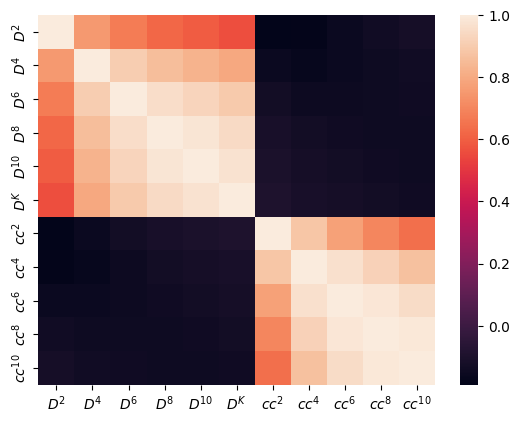

In [119]:
corr = disrup_dev1.corr()
sn.heatmap(corr, xticklabels=[r'$D^2$',r'$D^4$',r'$D^6$',r'$D^8$',r'$D^{10}$',r'$D^K$','$cc^2$','$cc^4$',r'$cc^6$',r'$cc^8$',r'$cc^{10}$'],
        yticklabels=[r'$D^2$',r'$D^4$',r'$D^6$',r'$D^8$',r'$D^{10}$',r'$D^K$','$cc^2$','$cc^4$',r'$cc^6$',r'$cc^8$',r'$cc^{10}$'])

<AxesSubplot:>

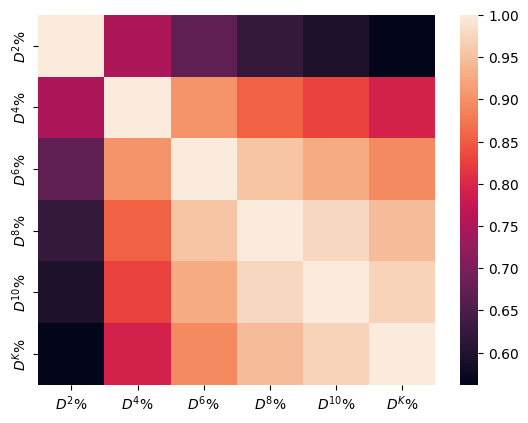

In [124]:
corr = disrup_dev1.corr()
sn.heatmap(corr, xticklabels=[r'$D^2\%$',r'$D^4\%$',r'$D^6\%$',r'$D^8\%$',r'$D^{10}\%$',r'$D^K\%$'],
        yticklabels=[r'$D^2\%$',r'$D^4\%$',r'$D^6\%$',r'$D^8\%$',r'$D^{10}\%$',r'$D^K\%$'])

In [491]:
top52[(top52['w2_ds']<0) &(top52['w10_ds']>0)]

,title,year,keywords,authors,fos,doi,venue,venue_name,n_authors,all_ds,...,w8_cc,w10_cc,delta_42,delta_64,delta_86,delta_108,delta_ds_42,delta_ds_64,delta_ds_86,delta_ds_108
16446,Temporal hyperprogramming,1990.0,"['Trellis hypertext document', 'temporal hyper...","[{'_id': '56018fdc45cedb3395e7a5f1', 'name': '...",NaN,10.1016/s1045-926x(05)80008-4,"{'_id': '555036e17cea80f954163359', 'raw': 'J....",J. Vis. Lang. Comput.,2,0.003071,...,19.0,19.0,5.0,8.0,3.0,0.0,0.009930,-0.001218,0.001257,-0.000868
18433,Reengineering inspection,1998.0,['Reengineering inspection'],"[{'_id': '5405ad4fdabfae8faa5f1c44', 'name': '...",NaN,10.1145/269012.269020,"{'_id': '555036f57cea80f954169e28', 'raw': 'Co...",Commun. ACM,1,0.005093,...,16.0,16.0,7.0,4.0,2.0,0.0,0.013128,0.003869,-0.001287,-0.000967
20486,The ``Test and Select'' Approach to Ensemble C...,2000.0,"['validation set', 'ensemble creation', 'impro...","[{'_id': '53f460fddabfaee4dc838376', 'name': '...","['Internal combustion engine', 'Computer scien...",10.1007/3-540-45014-9_3,"{'_id': '53908a3220f70186a0d9d050', 'type': '0...",MCS '00 Proceedings of the First International...,4,-0.000500,...,10.0,15.0,2.0,1.0,1.0,5.0,0.006044,-0.000353,-0.000172,0.004869
22640,A note off two binary signaling alphabets,1956.0,"['Error-correcting codes', 'Maximum-likelihood...","[{'_id': '5432719edabfaeb4c6a852a6', 'name': '...","['Forward error correction', 'Parity bit', 'Ha...",10.1109/tit.1956.1056790,"{'_id': '53a7318e20f7420be8d4ce94', 'name_d': ...",IEEE Transactions on Information Theory,1,0.026654,...,29.0,33.0,13.0,10.0,4.0,4.0,-0.050877,0.098004,0.042089,0.056463
23301,Basic polymorphic typechecking,1987.0,"['basic polymorphic typechecking', 'polymorphi...","[{'_id': '5448afafdabfae87b7e639d4', 'name': '...","['Integer', 'Lambda calculus', 'Parametrizatio...",10.1016/0167-6423(87)90019-0,"{'_id': '555036ce7cea80f954158d22', 'type': '0...",Sci. Comput. Program.,1,0.001941,...,7.0,12.0,3.0,2.0,1.0,5.0,-0.000818,0.003096,0.001027,0.000805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537593,Periocular biometrics: When iris recognition f...,2010.0,[],"[{'_id': '53f449a6dabfaeb22f4cd4a1', 'name': '...","['Computer vision', 'Iris recognition', 'Compu...",10.1109/btas.2010.5634498,"{'_id': '5736b0cad39c4f40a7996abd', 'name_d': ...",International Conference on Biometrics: Theory...,4,0.000517,...,28.0,28.0,13.0,7.0,4.0,0.0,0.000200,0.000772,0.000574,-0.000054
4447022,Robust deformable-surface-based skull-strippin...,2011.0,"['manual skull-stripping', 'brain tissue', 'ro...","[{'_id': '53f47090dabfaeecd6a33af8', 'name': '...","['Active contour model', 'Data mining', 'Patte...",10.1007/978-3-642-23626-6_78,"{'_id': '53a72b6c20f7420be8c25382', 'type': '0...",MICCAI (3),6,0.000198,...,21.0,21.0,3.0,8.0,7.0,0.0,0.000542,-0.000401,0.001203,-0.000014
4447080,Fast Practical Evolutionary Timetabling,1994.0,['fast practical evolutionary timetabling'],"[{'_id': '56029b3945cedb3395ff2c69', 'name': '...","['Fitness landscape', 'Evolutionary algorithm'...",10.1007/3-540-58483-8_19,"{'_id': '53a72abb20f7420be8c0c12c', 'type': '0...","Evolutionary Computing, AISB Workshop",3,0.019194,...,8.0,10.0,2.0,0.0,1.0,2.0,0.196429,-0.021429,0.014516,0.017117
4451679,A Feedback Based Scheme for Improving TCP Perf...,2001.0,['ad hoc wireless network'],"[{'_id': '53f43399dabfaee0d9b49b9d', 'name': '...","['Computer science', 'Computer network', 'Pack...",10.1109/98.904897,"{'_id': '53a7316b20f7420be8d4071a', 'raw': 'IE...",IEEE Personal Commun.,4,0.000567,...,52.0,58.0,15.0,12.0,12.0,6.0,0.004770,-0.001092,0.000076,-0.000432


In [41]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [35]:
disrup_dev = disrup_dev[~disrup_dev['w10_ds'].isna()]
disrup_dev = disrup_dev[~disrup_dev['w2_ds'].isna()]

In [36]:
yr_to_id = dict(zip(sorted(disrup_dev['year'].unique()), range(1,disrup_dev['year'].nunique()+1)))

In [37]:
disrup_dev['yr_count'] = disrup_dev['year'].map(yr_to_id)

In [38]:
model = ols(formula='w10_ds ~ w4_ds + C(year)', data=disrup_dev).fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 w10_ds   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 4.526e+04
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:39:07   Log-Likelihood:             1.6896e+05
No. Observations:               78193   AIC:                        -3.379e+05
Df Residuals:                   78181   BIC:                        -3.378e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0097      0.000    -22.142      0.000      -0.011      -0.009
C(year)[T.2001.0] -5.369e-05      0.001     -0.088      0.930      -0.001       0.001
C(year)[T.2002.0]     0.0016      0.001      2.671      0.008       0.000       0.003
C(year)[T.2003.0]     0.0015      0.001      2.711      0.007       0.000       0.003
C(year)[T.2004.0]     0.0025      0.001      4.496      0.000       0.001       0.004
C(year)[T.2005.0]     0.0031      0.001      5.691      0.000       0.002       0.004
C(year)[T.2006.0]     0.0046      0.001      8.600      0.000       0.004       0.006
C(year)[T.2007.0]     0.0052      0.001      9.801      0.000       0.004       0.006
C(year)[T.2008.0]     0.0058      0.001     10.998      0.000       0.005       0.007
C(year)[T.2009.0]     0.0065      0.001     12.465      0.000       0.005       0.008
C(year)[T.2010.0]     0.0076      0.001     14.587      0.000       0.007       0.009
w4_ds                 1.1618      0.002    702.925      0.000       1.159       1.165
==============================================================================
Omnibus:                    91931.187   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         38847414.251
Skew:                          -5.742   Prob(JB):                         0.00
Kurtosis:                     111.589   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, '')

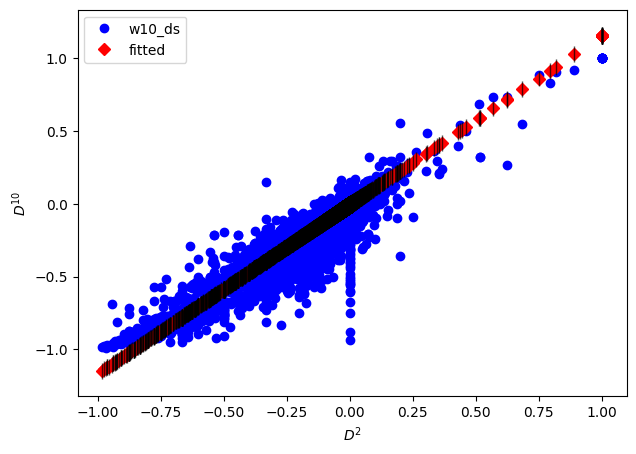

In [42]:
fig = sm.graphics.plot_fit(model, "w4_ds")
fig.tight_layout(pad=1.0)
plt.ylabel(r'$D^{10}$')
plt.xlabel(r'$D^2$')
plt.title("")

In [43]:
model = ols(formula='w10_ds ~ w2_ds + C(year)', data=disrup_dev).fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 w10_ds   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                 1.325e+04
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:40:38   Log-Likelihood:             1.3201e+05
No. Observations:               78193   AIC:                        -2.640e+05
Df Residuals:                   78181   BIC:                        -2.639e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0182      0.001    -25.966      0.000      -0.020      -0.017
C(year)[T.2001.0] -8.254e-05      0.001     -0.085      0.932      -0.002       0.002
C(year)[T.2002.0]     0.0016      0.001      1.720      0.085      -0.000       0.003
C(year)[T.2003.0]     0.0018      0.001      1.955      0.051   -4.73e-06       0.004
C(year)[T.2004.0]     0.0039      0.001      4.396      0.000       0.002       0.006
C(year)[T.2005.0]     0.0052      0.001      5.904      0.000       0.003       0.007
C(year)[T.2006.0]     0.0068      0.001      7.929      0.000       0.005       0.008
C(year)[T.2007.0]     0.0072      0.001      8.527      0.000       0.006       0.009
C(year)[T.2008.0]     0.0092      0.001     10.836      0.000       0.008       0.011
C(year)[T.2009.0]     0.0097      0.001     11.520      0.000       0.008       0.011
C(year)[T.2010.0]     0.0111      0.001     13.338      0.000       0.009       0.013
w2_ds                 1.2648      0.003    379.805      0.000       1.258       1.271
==============================================================================
Omnibus:                    88228.286   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48474524.727
Skew:                          -5.206   Prob(JB):                         0.00
Kurtosis:                     124.532   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ValueError: 'w4_ds' is not in list

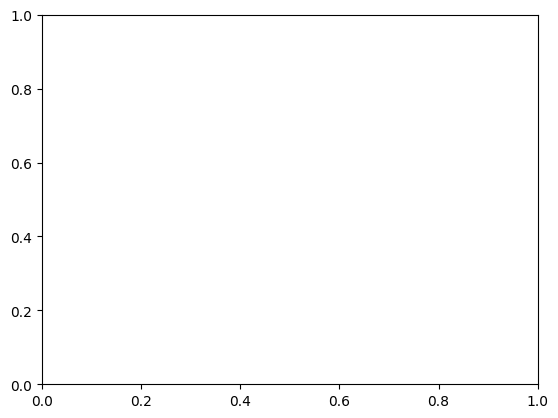

In [45]:
fig = sm.graphics.plot_fit(model, "w4_ds")
fig.tight_layout(pad=1.0)
plt.ylabel(r'$D^{10}$')
plt.xlabel(r'$D^2$')
plt.title("")

In [265]:
model = ols(formula='w10_ds ~ w10_cc + C(year)', data=disrup_dev).fit()

Text(0.5, 1.0, '')

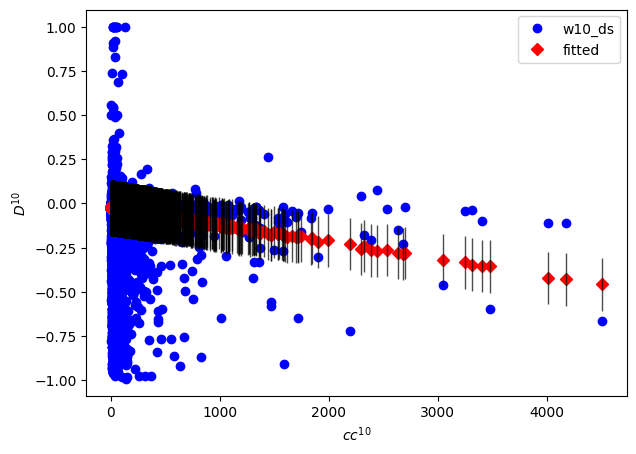

In [267]:
fig = sm.graphics.plot_fit(model, "w10_cc")
fig.tight_layout(pad=1.0)
plt.ylabel(r'$D^{10}$')
plt.xlabel(r'$cc^{10}$')
plt.title("")